# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Udacity smartcab does not move. In each trial the car is idle while the traffic conditions change. It recieves both positive and negative rewards depending on the traffic lights. If the car is idle on a red light it gets a small reward usually between 1-3. However if there is a green light the car gets a negative reward usually between 4-6. While rare, if there is oncoming traffic when the car is sitting at the stop light, it gets a small reward of between 1-2.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

agent.py: There are mutliple flags that can be altered in the agent.py code however I decided to look at 'num_dummies', 'learning', and 'n_test'.

The number of dummies will determine how many dummy agents (besides our Udacity smartcab) are on the road (default is 100). If the grid size stays fixed but we increase 'num_dummies', we end up with more cars on the street (more traffic). A lower number will reduce traffic conditions and thus fewer occurences of oncoming traffic the smartcab will deal with.

The 'learning' flag is actually composed of two flags epsilon and alpha. Epsilon determines how much the agent will keep exploring vs exploitation (keep performing actions from its current policy at the time of training). Alpha is the smartcabs learning rate which determines how much the agent is updating its learning policy based on the rewards it recieves. By default epsilon is 1 which gives it 100% probability of taking random actions. If we change the value of epsilon between 0-1 it will change how much the agent decided to take random actions vs the best policy known so far. On the other hand changing alpha will determine how fast the agent converges to an optimal policy. A large alpha would heavily favor more recent experience over historical observations which can affect performance. If the alpha is too high it might converge to local policy, on the other hand a low learning rate might take a long time to arrive at an optimal policy.

The 'n_test' flag will determine the number of trials the learnt model will be tested on. Default is set to zero so we need to change it if we want to see how the model will ultimately be graded.


environment.py: When an agent performs an action it calls the environments's def act(self, agent, action) procedure. According to the documentation the function determines if the agent's action is legal and what reward it should get based on the current traffic conditions.


simulator.py: Both render_text() and render() simulated trial data. However render_text() is the non-GUI render display while render() is the GUI render version. According to the documentation the "supplementary trial data can be found from render_text".


planner.py: Accoding to planner.py def next_waypoint(self), the procedure first checks the East or West location first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


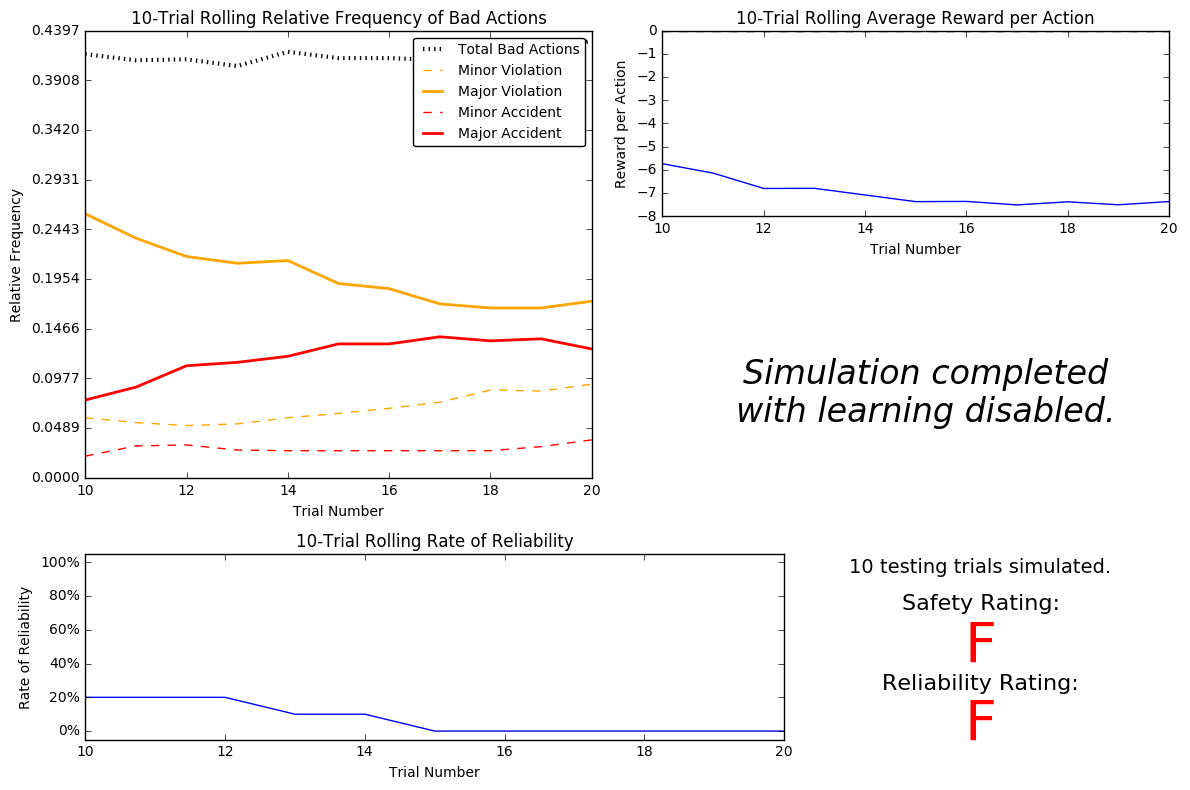

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

According to the "10-Trial Rolling Relative Frequency of Bad Actions" graph the agent takes bad action around 40% of the time which seems to cause accidents about 15% of the time (both major and minor).

The "10-Trial Rolling Rate of Reliability" shows the agent starts low at 20% (at its highest point) than gradually down to zero throughout the rest of the trails. I am a bit surprised to see the reliability consistently at 20% for the first 12 trials before it dips and stays at zero after roughly 15 trials considering the agent should be acting randomly throughout all trials. However the results still make sense that the cab is not safe nor reliablily at arriving to its final destination.

Looking at the "10-Trial Rolling Average Reward per Action" we see that the agent consistently receives a large number of negative rewards for taking random actions. When taking random actions, it ignores traffic laws and conditons that rack up a large number of traffic accidents thus pulling down the rewards it receives.

Analyzing all three charts seems to suggest that no major results change in the reliabity or rewards of the smartcab though they both do consistently and gradually reduce their performance. In the relative frequency of bad actions chart we see consistent minor accidents and violations. The significant change however seems to be with the major accidents and drop from 26% to about 18% and an increase of major violations from 7% to 12%. The overall rate of bad actions stays consistent.

I would not consider the smartcab safe or reliable. With 40% of bad actions it would place numerous passangers at sever danger which is not worth the risk or cost to get to their final destination. In addition, a track record of getting less than 20% of passangers to their destination on time is neither efficient or worth the risk when potential customers have plenty of other possible forms of transportation.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The smartcab needs first be able to determine where it is (its current state) relative to the final destination. In order to get to the target, the cab needs to know the 'waypoint' otherwise it will have to randomly search the city streets which is not very reliable as we seen in the first trial run. 

In addition using the waypoint, the agent needs to prioritize safety of its passangers by following the rules of the road. It requires that the agent know and obey traffic lights as well as the right of way rules when other cars are at a given intersection. To sense the traffic lights, the agent needs to sense the 'light' sensor (red for stop and green for go).

As for dealing with other cars on the streets, the smartcab needs to only read in the 'left' and 'oncoming' traffic conditions to avoid crashing. For instance, if the smartcab is turning right during a red lights it needs to first check the traffic conditons from the left or oncoming before moving. The 'right' sensory input however is not needed. Its traffic conditions do not need to be considered if the agent properly obeys red stop lights when moving forwards or to the left.

I would also recommend ruling out 'deadline'. The sensor does not give the agent a more informed decision to arriving to the final destination and can give mixed results since the starting and final destination vary from trial to trial.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The sensors and features I decided to use were 'waypoint', 'light', 'left' and 'oncoming'. Waypoint has 4 possible values of 'forward', 'left', 'right', and 'None' (if it reaches the final destination). The lights can either be 'red' or 'green' while left and oncoming both have four actions each of 'north', 'south', 'east', 'west'. Together they comprise of 4x2x4x4 = 128 possible states for the agent to consider. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

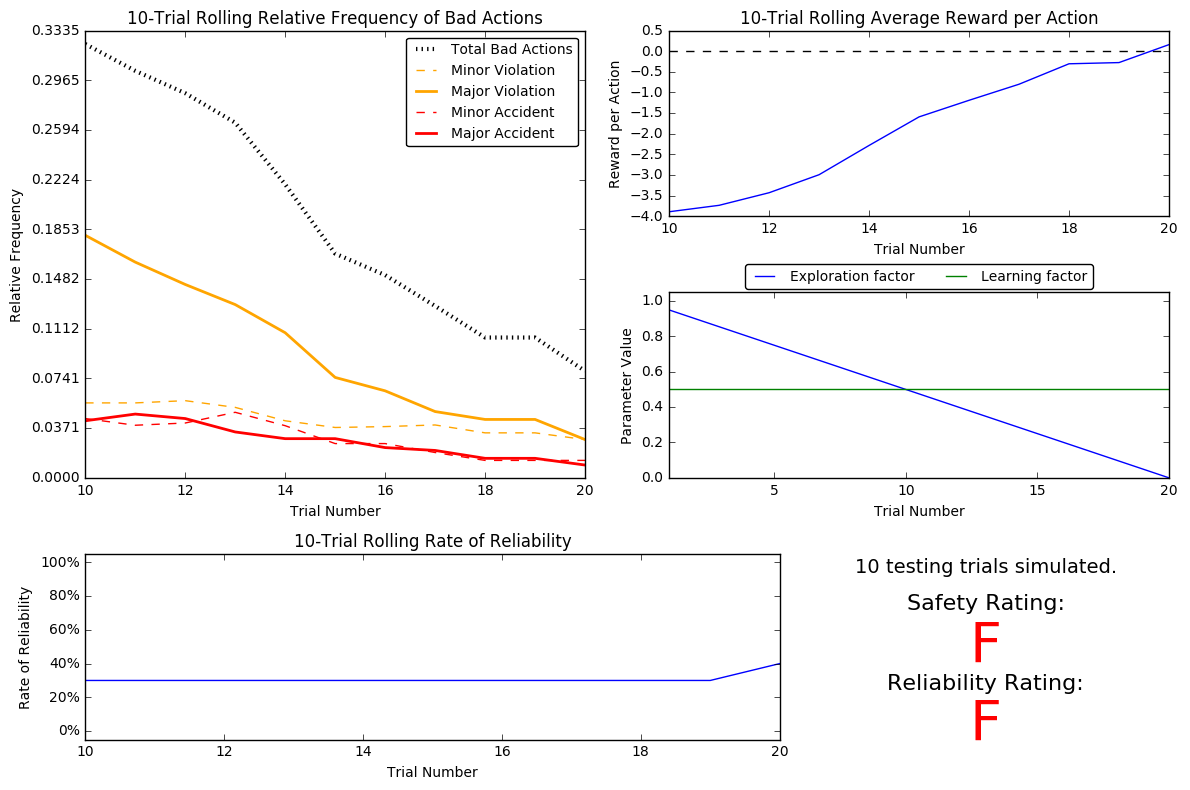

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The "10-Trial Rolling Relative Frequency of Bad Actions" graph shows the agent starts off with high percent of bad actions before drastically dropping down to roughly 7.5% towards the last trial. Major accidents and violations combined totaled near 4%.

In the "10-Trial Rolling Rate of Reliability" we see that the agent starts low at 30% than in the last trial increases to 40%.

Analyzing the "10-Trial Rolling Average Reward per Action" we see that the agent consistently receives a large number of negative rewards for taking random actions in the beginning but gradually improves its rolling reward average in a linear rate. In the last couple of trials the q-learning agent starts to learn a policy that earns slightly more positive rewards.

The Relative Frequency of Bad Actions and Average Reward per Action charts seems to suggest that the agent is making significant policy changes as it learns to interact with the environment.

Despite the improvements I would still not consider the smartcab safe or reliable. The smartcab still has roughly a 7.5% chance of making bad actions with 4% being major. Not a chance most passangers would want to take a chance in. While the agent has significantly improved is reliability, it still only gets to the final destination less than 40% of the time - not a great track record for potential clients and passengers to have confidence in.

From the provided charts I see a dramatic improvement in reducing bad actions (of all kinds) and reducing of negative rewards as the number of trials increase. The only chart that seems to remotely look like the random agent is the rate of reliability chart. However this is only true for the first set of trials. Unlike the random agent, the q-learning agent maintains a consistent reliability of 30% (10% higher than the random agent) and slightly increase to 40% in the last trial.

The agent used 20 trials before it underwent testing with a linear decay since it starts at 1 before gradually decaying to zero. The exploration factor drops in a linear manner, which is as expected considering we implemented a linear decaying function.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

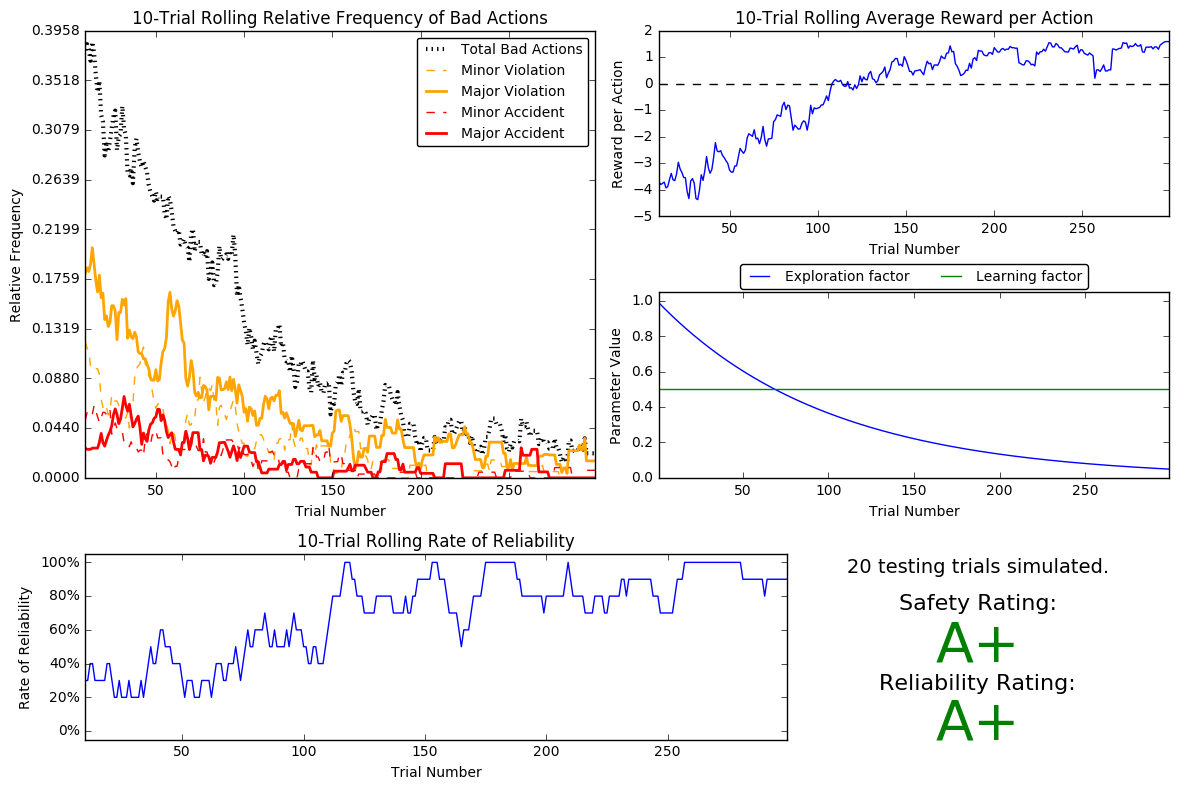

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I used a exponential decay fuction:
$ \epsilon = a^t, 0 < a < 1 $ where there epsilon was initalized to 1. The alpha decay rate was set at 0.99 and the alpha learning rate kept at 0.5. I kept epsilon at 1 because the agent needed to first explore the state space with random actions before it could learn rules of the road. In addition the default alpha learning rate was kept at 0.5 since I wanted to make sure the cab updated its learning experience without completely overriding its previous experiences. I played around with the values of the decay rate from values such as 0.9, 0.95 before trying 0.99. With 0.9 the cab had roughly 20 trials but severly underperformed on both saftey and reliability (both recieved F ratings). Using 0.95 the trials increased to about 50 where the safety rating improved to a D. I realized after looking at the performanced charts the smartcab was just not learning fast enough nor did it have enough experience learning the proper decisions. Thus on the third try I decided to test the decay rate with 0.99. The simulation took roughly 300 training trials to learn an optimal policy. 

Since the q-learning agent took far longer to train, the model improves drastically. Unlike the original q-agent, the optimal agent passed both the safety and reliability tests with A+'s. This is noted in that in the reliability graph the agent gets to the final destination 90% of the time (twice the rate of the orginal q-learning agent) and the total number of bad actions taken by the agent are less than 4.4% (cutting down the bad decision by half). 

Based on these rating I would say the agent is pretty close to learning an optimal mode. Though the agent has made huge improvements I am still not quite satisfied with the ratings. While I'm glad the agent passed the safety and reliability with flying colors I still see that major violations are taken by the car 4% of the time. From a safety perspective this seems too high to be both ethically and economically sound. While not practical for this simulation, more test and data points should be conducted to drop the bad decision to less than a thousands of a percent before I would consider it safe. It would also be more beneficial to have the agent reach the target destination above 95% of the time. However given the agent has no control over the traffic conditions perhaps it would be more informative to alter the metric to consider only actions the agent can affect such as only minimal steps to get to final destination.



### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

In order for the agent to act optimally, we should see signs it follows the waypoint direction to the target goal while at the same time obeying traffic lights and conditions. For instance, at an intersection where the smartcab is directed to turn right during a red light with traffic coming from the left, we should see the agent take no action. When the light turns green or there are no cars coming from the east we should see that the agent take a right.

To help in our observation I have posted the last three state observations and their respective q-values for each action the agent could take:

('left', 'red', None, 'right')
 -- forward : -2.94
 -- right : 9.95
 -- None : 8.53
 -- left : -30.89

('right', 'red', 'right', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.32
 -- left : 0.00

('right', 'red', None, 'forward')
 -- forward : 17.91
 -- right : 35.60
 -- None : 58.78
 -- left : 22.77
 
In the first observation we can see that the cab is at an intersection with a red stop sign needing to turn left. There is no car on the left side but there is an oncoming car wanting to turn toward's its right. Since the agent is at a stop light the desired policy should keep the cab idle and make no moves until the light turns green with no oncoming traffic to imped is intended direction. As we can see it has a q-value of -2.94 for going forward which makes sense at a red light, 9.95 for going right which seems incorrect since this is the wrong direction, 8.53 for staying idle, and finally -30.89 for going the right direction but doing so at a stop light. The policy seems sub-optimal here since it should favor staying idle but instead prefers to go in the opposite direction.

The second observation the cab is again at a red stop sign. Waypoint, light, left, and oncoming are 'right', 'red', 'right', 'right' respectively. Here the agent should again perfer to stay idle so it won't crash into oncoming traffic that plans to go to the right. As we see the agent does prefer staying put.

In the final observation we see 'right', 'red', None, 'forward' for the waypoint, light, left, and oncoming sensory conditions. This again points to a cab that needs to turn right on a red stop sign but still prefers to to stay put before going right. Interesting enough though it prefers to keep it safe before taking the right direction it still has positive values for any direction the agent decided to take. 

While the ratings and reliablitiy of the optimal agent were high, based on my observations of the last three actions taken by the agent and what the optimal policy should look like I am inclined to believe the agent is not acting optimaly. This suggest to me the agent could learn from more specific examples of good and bad driving behaviors.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The gamma discount factor is used to deal with a extremely long or non-ending markov decision processes. In the case where the agent can take an infinite series of actions, the q-values grows to indefinitely high or low values.

In the smartcab task the agent has a smaller city grid where even if it takes a random series of actions it unlikely for the agent to go indefinietly without every reaching the final destination. It's also important to note that there is an imposed deadline for the agent to reach a final destination to further limits indefinite q-value growth. Last observation to highlight is that the environment of the smartcab is inherently non-deterministic, thus it makes connecting the current state action pair to series of future state action pairs unreliable since we do not know how much of the values generate have to do with the action the agent took vs random placement of traffic lights and traffic conditions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.